In [1]:
import warnings # Ignoreing all the warning
warnings.filterwarnings("ignore")

In [2]:
# Loading all the library
import os
import numpy
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score
%matplotlib inline

# Loading the data 

In [4]:
Data = pd.read_csv("heart.csv")
Data.columns # # column Name of Data

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
Data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Count of Target variable

In [6]:
Data['target'].value_counts() # Get the value_counts for Heart Diseases class and not Heart Diseases 

1    165
0    138
Name: target, dtype: int64

 ##### There is no imbalance in Data set so no need of downsampling

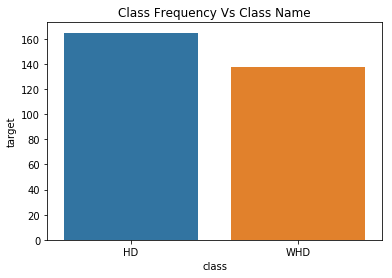

In [8]:
class_dist_df = pd.DataFrame(Data['target'].value_counts()).reset_index(drop=True)# Reseting the index and get the counts for each class 
class_dist_df['class']= ['HD','WHD'] # HD Means Heart diseases and WHD means NO diseases
sns.barplot(y = 'target', x = class_dist_df['class'], data=class_dist_df) # Plotting Class frequency vs Class
pyplot.title('Class Frequency Vs Class Name')
pyplot.show()

# Data anlaysis and Feature Selection



#### AGE ANALYSIS

In [9]:
DF_HD = Data[Data['target']==1] # Dataframe of Heart diseases
DF_WHD = Data[Data['target']==0] # Dataframe of Without Heart diseases

In [10]:
DF_HD.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
DF_WHD.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [11]:
DF_WHD['age'].describe() #This will output the basic statsitics of age in population

count    138.000000
mean      56.601449
std        7.962082
min       35.000000
25%       52.000000
50%       58.000000
75%       62.000000
max       77.000000
Name: age, dtype: float64

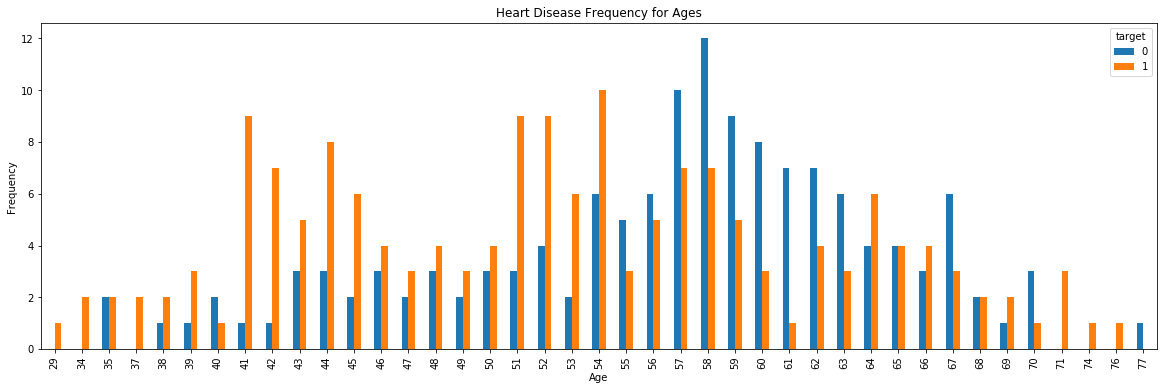

In [12]:
# Hist of Age
DF =DF_HD.append(DF_WHD) 
pd.crosstab(DF['age'],DF['target']).plot(kind="bar",figsize=(20,6))
pyplot.title('Heart Disease Frequency for Ages')
pyplot.xlabel('Age')
pyplot.ylabel('Frequency')
pyplot.savefig('heartDiseaseAndAges.png')
pyplot.show()

#### After analysis histrogram with age we are not able say anything about Heart diseases

#### Gender analysis 


In [13]:
print ('male count with the heart dieases ='), DF_HD[DF_HD['sex']==1]['sex'].value_counts() # 1 means Male in Sex Column

male count with the heart dieases =


(None, 1    93
 Name: sex, dtype: int64)

In [14]:
print ('male count without the heart dieases ='), DF_WHD[DF_WHD['sex']==1]['sex'].count() # 0 means Female in Sex column

male count without the heart dieases =


(None, 114)

In [15]:
print ('Female count with the heart dieases ='), len(DF_HD[DF_HD['sex']==0]['sex'])

Female count with the heart dieases =


(None, 72)

In [16]:
print ('Female count without the heart dieases ='), len(DF_WHD[DF_WHD['sex']==0]['sex'])

Female count without the heart dieases =


(None, 24)

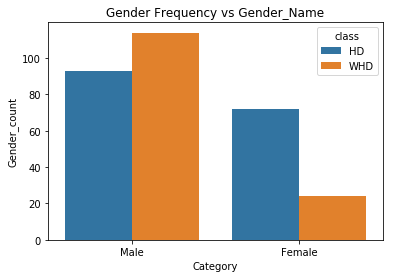

In [17]:
Gender_HD = pd.DataFrame(DF_HD['sex'].value_counts()).reset_index() # Value counts for sex with Heart diseases
Gender_WHD = pd.DataFrame(DF_WHD['sex'].value_counts()).reset_index() # Value counts for sex with withot Heart diseases
Gender_HD['class'] = "HD"
Gender_WHD['class'] = "WHD"
Gender_HD['index'] =['Male','Female']
Gender_WHD['index'] =['Male','Female']
Gender_DF = Gender_HD.append(Gender_WHD)
Gender_DF.columns = ['Category','Gender_count','class']
sns.barplot(y='Gender_count', x='Category', data=Gender_DF, hue='class')
pyplot.title('Gender Frequency vs Gender_Name')
pyplot.show()

#### Female population are more tend to Heart dieases in the population 


#### combine 2 Features gender and male

In [18]:
print ('male age with heart dieases ='), DF_HD[DF_HD['sex']==1]['age'].describe()
print ('male age without heart dieases ='), DF_WHD[DF_WHD['sex']==1]['age'].describe()
print ('Female age without heart dieases ='), DF_WHD[DF_WHD['sex']==0]['age'].describe()
print ('Female age without heart dieases ='), DF_HD[DF_HD['sex']==0]['age'].describe()

male age with heart dieases =
male age without heart dieases =
Female age without heart dieases =
Female age without heart dieases =


(None, count    72.000000
 mean     54.555556
 std      10.265337
 min      34.000000
 25%      46.000000
 50%      54.000000
 75%      63.250000
 max      76.000000
 Name: age, dtype: float64)

#### Chest Pain Type Analysis

In [19]:
DF_HD['cp'].value_counts() # Get value counts for each class 

2    69
1    41
0    39
3    16
Name: cp, dtype: int64

In [20]:
DF_WHD['cp'].value_counts() # Get value counts for each class 

0    104
2     18
1      9
3      7
Name: cp, dtype: int64

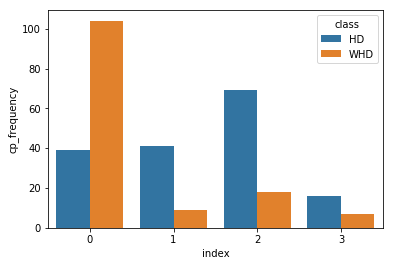

In [22]:
cp_dist_df = pd.DataFrame(DF_HD['cp'].value_counts()).reset_index() # Value counts for CP with Heart diseases
cp_dist_Wdf = pd.DataFrame(DF_WHD['cp'].value_counts()).reset_index()# Value counts for CP without Heart diseases
cp_dist_df['class'] = "HD"
cp_dist_Wdf['class'] = "WHD"
cp_dist_df_copy = cp_dist_df.copy()
cp_dist_df_copy = cp_dist_df_copy.append(cp_dist_Wdf)
cp_dist_df_copy.columns = [u'index', u'cp_frequency', u'class']
sns.barplot(y='cp_frequency', x='index', data=cp_dist_df_copy, hue='class')
pyplot.show()

#### 0 means less possibilty of heart attack
#### 1 means more possibity of heart attack
#### 2 means more possibity of heart attack
#### 3 means more or less possibity of heart attack confused..

#### The resting blood Pressure 

In [23]:
DF_HD['trestbps'].describe() # Basic statsitics for trestbps for Heart Diseases cases

count    165.000000
mean     129.303030
std       16.169613
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: trestbps, dtype: float64

In [24]:
DF_WHD['trestbps'].describe() # Basic statsitics for trestbps for without Heart Diseases cases

count    138.000000
mean     134.398551
std       18.729944
min      100.000000
25%      120.000000
50%      130.000000
75%      144.750000
max      200.000000
Name: trestbps, dtype: float64

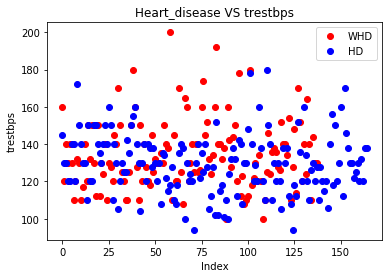

In [25]:
pyplot.plot(DF[DF['target']==0]['trestbps'].values,'ro',label='WHD') # Heart Diseases cases vs trestbps
pyplot.plot(DF[DF['target']!=0]['trestbps'].values,'bo',label='HD') # Without Heart Diseases cases vs trestbps
pyplot.xlabel('Index')
pyplot.ylabel('trestbps')
pyplot.title('Heart_disease VS trestbps')
pyplot.legend()
pyplot.show()

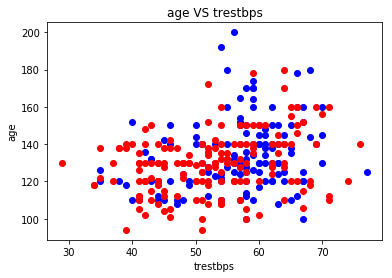

In [26]:
# Plot between age vs trestbps
pyplot.plot(DF_WHD['age'],DF_WHD['trestbps'],'bo')
pyplot.plot(DF_HD['age'],DF_HD['trestbps'],'ro')
pyplot.title('age VS trestbps')
pyplot.ylabel('age')
pyplot.xlabel('trestbps')
pyplot.show()

#### No descision Boundary to classify between of heart disease and Not a heart disease with help of  trestbps


#### chol analysis(serum cholestoral in mg/dl)

In [27]:
DF_HD['chol'].describe()# Basic statsitics for chol for Heart Diseases cases

count    165.000000
mean     242.230303
std       53.552872
min      126.000000
25%      208.000000
50%      234.000000
75%      267.000000
max      564.000000
Name: chol, dtype: float64

In [28]:
DF_WHD['chol'].describe() # Basic statsitics for chol for without Heart Diseases cases

count    138.000000
mean     251.086957
std       49.454614
min      131.000000
25%      217.250000
50%      249.000000
75%      283.000000
max      409.000000
Name: chol, dtype: float64

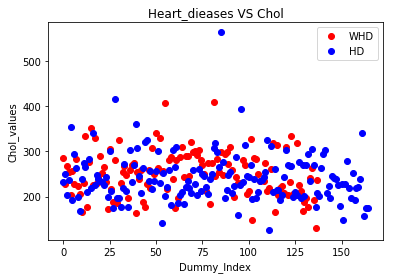

In [29]:
# Plot of target variable with chol level
pyplot.plot(DF[DF['target']==0]['chol'].values,'ro',label='WHD')
pyplot.plot(DF[DF['target']!=0]['chol'].values,'bo',label='HD')
pyplot.xlabel('Dummy_Index')
pyplot.ylabel('Chol_values')
pyplot.title('Heart_dieases VS Chol')
pyplot.legend()
pyplot.show()

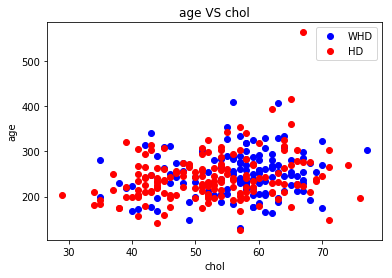

In [30]:
# Plot of age value with chol level
pyplot.plot(DF_WHD['age'],DF_WHD['chol'],'bo',label='WHD')
pyplot.plot(DF_HD['age'],DF_HD['chol'],'ro',label='HD')
pyplot.title('age VS chol')
pyplot.ylabel('age')
pyplot.xlabel('chol')
pyplot.legend()
pyplot.show()

#### No descision Boundary to classify between of heart disease and Not a heart disease with help of  chol

#### FBS Analysis(fasting blood sugar)

In [31]:
DF_HD['fbs'].value_counts() # Value counts for categorical data (FBS) for heart disease

0    142
1     23
Name: fbs, dtype: int64

In [32]:
DF_WHD['fbs'].value_counts() # Value counts for categorical data (FBS) for without heart disease

0    116
1     22
Name: fbs, dtype: int64

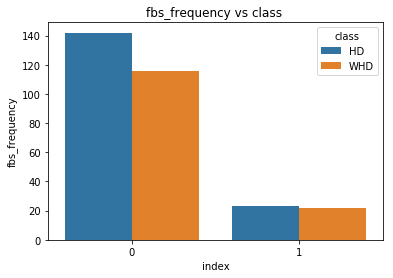

In [33]:
fbs_dist_df = pd.DataFrame(DF_HD['fbs'].value_counts()).reset_index()
fbs_dist_Wdf = pd.DataFrame(DF_WHD['fbs'].value_counts()).reset_index()
fbs_dist_df['class'] = "HD"
fbs_dist_Wdf['class'] = "WHD"
fbs_dist_df_copy = fbs_dist_df.copy()
fbs_dist_df_copy = fbs_dist_df_copy.append(fbs_dist_Wdf)
fbs_dist_df_copy.columns = [u'index', u'fbs_frequency', u'class']
sns.barplot(y='fbs_frequency', x='index', data=fbs_dist_df_copy, hue='class')
pyplot.title('fbs_frequency vs class ')
pyplot.show()

#### Not providing much information about classification of Heart disease and Non Heart disease

#### Restecg analysis(resting electrocardiographic results)

In [34]:
DF_HD['restecg'].value_counts()  # Value counts for categorical data (restecg) for heart disease

1    96
0    68
2     1
Name: restecg, dtype: int64

In [35]:
DF_WHD['restecg'].value_counts() # Value counts for categorical data (restecg) for without heart disease

0    79
1    56
2     3
Name: restecg, dtype: int64

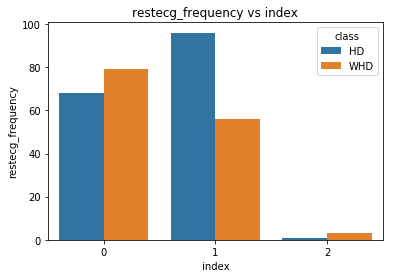

In [36]:
restecg_dist_df = pd.DataFrame(DF_HD['restecg'].value_counts()).reset_index() # value counts for restecg for Heart diseases Cases
restecg_dist_Wdf = pd.DataFrame(DF_WHD['restecg'].value_counts()).reset_index()# value counts for restecg for without Heart diseases Cases
restecg_dist_df['class'] = "HD"
restecg_dist_Wdf['class'] = "WHD"
restecg_dist_df_copy = restecg_dist_df.copy()
restecg_dist_df_copy = restecg_dist_df_copy.append(restecg_dist_Wdf)
restecg_dist_df_copy.columns = [u'index', u'restecg_frequency', u'class']
sns.barplot(y='restecg_frequency', x='index', data=restecg_dist_df_copy, hue='class')
pyplot.title('restecg_frequency vs index')
pyplot.show()

#### 1.Restecg with type 1 have more probablity of Heart dieases 
#### 2.Restecg with type 0 have less probablity of Heart dieases 
#### 3.Restecg with type 2 have less probablity of Heart dieases 

####  thalach(maximum heart rate achieved)

In [37]:
DF_HD['thalach'].describe() # Basic statstics for thalach for Heart diseases 

count    165.000000
mean     158.466667
std       19.174276
min       96.000000
25%      149.000000
50%      161.000000
75%      172.000000
max      202.000000
Name: thalach, dtype: float64

In [38]:
DF_WHD['thalach'].describe() # Basic statstics for thalach for without Heart diseases 

count    138.000000
mean     139.101449
std       22.598782
min       71.000000
25%      125.000000
50%      142.000000
75%      156.000000
max      195.000000
Name: thalach, dtype: float64

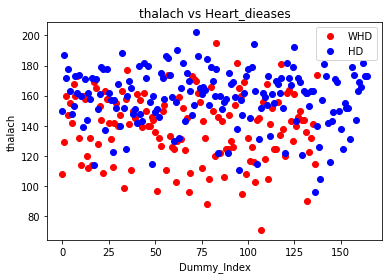

In [39]:
# Plot between target vs thalach
pyplot.plot(DF[DF['target']==0]['thalach'].values,'ro',label='WHD')
pyplot.plot(DF[DF['target']!=0]['thalach'].values,'bo',label='HD')
pyplot.xlabel('Dummy_Index')
pyplot.ylabel('thalach')
pyplot.title('thalach vs Heart_dieases')
pyplot.legend()
pyplot.show()

#### exang(exercise induced angina)

In [40]:
DF_HD['exang'].value_counts()  # Value counts for categorical data (exang) for heart disease

0    142
1     23
Name: exang, dtype: int64

In [41]:
DF_WHD['exang'].value_counts() # Value counts for categorical data (exang) for without heart disease

1    76
0    62
Name: exang, dtype: int64

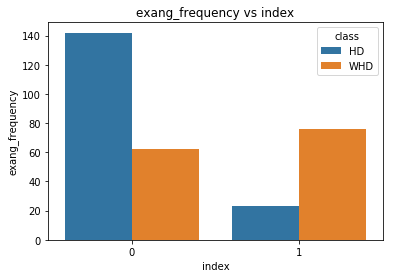

In [42]:
exang_dist_df = pd.DataFrame(DF_HD['exang'].value_counts()).reset_index()
exang_dist_Wdf = pd.DataFrame(DF_WHD['exang'].value_counts()).reset_index()
exang_dist_df['class'] = "HD"
exang_dist_Wdf['class'] = "WHD"
exang_dist_df_copy = exang_dist_df.copy()
exang_dist_df_copy = exang_dist_df_copy.append(exang_dist_Wdf)
exang_dist_df_copy.columns = ['index','exang_frequency','class']
sns.barplot(y='exang_frequency', x='index', data=exang_dist_df_copy, hue='class')
pyplot.title('exang_frequency vs index')
pyplot.show()

#### More probablity of heart disease for Type 0 exang
#### More probablity of heart disease for Type 1 exang


#### oldpeak(ST depression induced by exercise relative to rest)

In [43]:
DF_HD[u'oldpeak'].describe() # Basic statstics for oldpeak for Heart diseases 

count    165.000000
mean       0.583030
std        0.780683
min        0.000000
25%        0.000000
50%        0.200000
75%        1.000000
max        4.200000
Name: oldpeak, dtype: float64

In [44]:
DF_WHD[u'oldpeak'].describe() # Basic statstics for oldpeak for without Heart diseases 

count    138.000000
mean       1.585507
std        1.300340
min        0.000000
25%        0.600000
50%        1.400000
75%        2.500000
max        6.200000
Name: oldpeak, dtype: float64

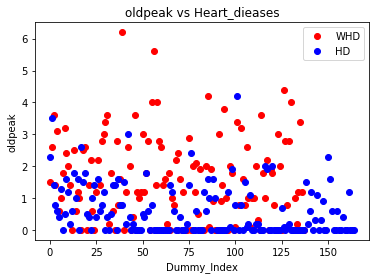

In [45]:
pyplot.plot(DF[DF['target']==0]['oldpeak'].values,'ro',label='WHD')
pyplot.plot(DF[DF['target']!=0]['oldpeak'].values,'bo',label='HD')
pyplot.xlabel('Dummy_Index')
pyplot.ylabel('oldpeak')
pyplot.title('oldpeak vs Heart_dieases')
pyplot.legend()
pyplot.show()

#### slope(the slope of the peak exercise ST segment)

In [46]:
DF_WHD[u'slope'].value_counts() # Value counts for categorical data (slope) for heart disease

1    91
2    35
0    12
Name: slope, dtype: int64

In [47]:
DF_HD[u'slope'].value_counts()  # Value counts for categorical data (slope) for without heart disease

2    107
1     49
0      9
Name: slope, dtype: int64

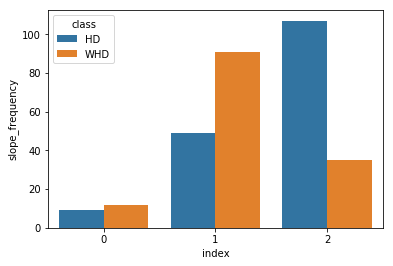

In [48]:
slope_dist_df = pd.DataFrame(DF_HD['slope'].value_counts()).reset_index()
slope_dist_Wdf = pd.DataFrame(DF_WHD['slope'].value_counts()).reset_index()
slope_dist_df['class'] = "HD"
slope_dist_Wdf['class'] = "WHD"
slope_dist_df_copy = slope_dist_df.copy()
slope_dist_df_copy = slope_dist_df_copy.append(slope_dist_Wdf)
slope_dist_df_copy.columns = ['index','slope_frequency','class']
sns.barplot(y='slope_frequency', x='index', data=slope_dist_df_copy, hue='class')
pyplot.show()

#### Slope 0 means Very less difference
#### Slope 1 Means less probability  for Heart Disease
#### Slope 2 Means high probability  for Heart Disease

#### Ca(number of major vessels (0-3) colored by flourosopy)

In [46]:
DF_HD['ca'].value_counts() # Value counts for categorical data (ca) for heart disease

0    130
1     21
2      7
4      4
3      3
Name: ca, dtype: int64

In [47]:
DF_WHD['ca'].value_counts() # Value counts for categorical data (ca) for without heart disease

0    45
1    44
2    31
3    17
4     1
Name: ca, dtype: int64

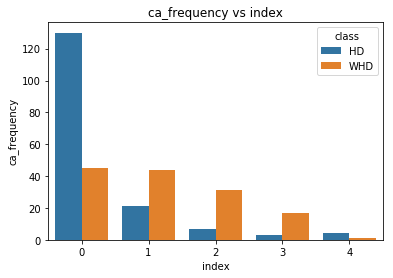

In [48]:
ca_dist_df = pd.DataFrame(DF_HD['ca'].value_counts()).reset_index()
ca_dist_Wdf = pd.DataFrame(DF_WHD['ca'].value_counts()).reset_index()
ca_dist_df['class'] = "HD"
ca_dist_Wdf['class'] = "WHD"
ca_dist_df_copy = ca_dist_df.copy()
ca_dist_df_copy = ca_dist_df_copy.append(ca_dist_Wdf)
ca_dist_df_copy.columns =['index','ca_frequency','class']
sns.barplot(y='ca_frequency', x='index', data=ca_dist_df_copy, hue='class')
pyplot.title('ca_frequency vs index')
pyplot.show()

#### Ca with value 0 means high probability of Heart disease
#### Ca with value 1 means low probability of Heart disease
#### Ca with value 2 means low probability of Heart disease
#### Ca with value 3 means low probability of Heart disease
#### Ca with value 4 means very less difference in  positive and Negative class

#### Thal(reversable defect)

In [49]:
DF_HD['thal'].value_counts()# Value counts for categorical data (thal) for heart disease

2    130
3     28
1      6
0      1
Name: thal, dtype: int64

In [50]:
DF_WHD['thal'].value_counts()# Value counts for categorical data (thal) for without heart disease

3    89
2    36
1    12
0     1
Name: thal, dtype: int64

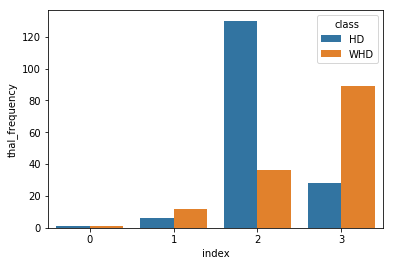

In [51]:
thal_dist_df = pd.DataFrame(DF_HD['thal'].value_counts()).reset_index()
thal_dist_Wdf = pd.DataFrame(DF_WHD['thal'].value_counts()).reset_index()
thal_dist_df['class'] = "HD"
thal_dist_Wdf['class'] = "WHD"
thal_dist_df_copy = thal_dist_df.copy()
thal_dist_df_copy = thal_dist_df_copy.append(thal_dist_Wdf)
thal_dist_df_copy.columns = ['index','thal_frequency','class']
sns.barplot(y='thal_frequency', x='index', data=thal_dist_df_copy, hue='class')
pyplot.show()

#### thal with value 2 have more probabilty of Heart disease
#### thal with value 3 have less probabilty of Heart disease
#### thal with value 1 very less difference in positive and Negative class
#### thal with value 0 no difference positive and Negative class

# Forming Feature Dataframe

In [52]:
Features = ['thal','ca','slope','exang','restecg','trestbps','cp','sex'] # we will choose only these based on above analysis

In [53]:
Data[Features].head(5) # Print the prepared Data

,thal,ca,slope,exang,restecg,trestbps,cp,sex
0,1,0,0,0,0,145,3,1
1,2,0,0,0,1,130,2,1
2,2,0,2,0,0,130,1,0
3,2,0,2,0,1,120,1,1
4,2,0,2,1,1,120,0,0


In [54]:
# This Function will convert categorical data to numerical data and put the data of different category into different column
def one_hot_coding(Data,column_name):
    thal_value = Data[column_name].tolist()
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(thal_value)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    new_df = pd.DataFrame(onehot_encoded)
    new_df = rename_column(new_df,column_name)
    return new_df

In [55]:
# This function rename the columns created by above column 
def rename_column(new_df,column_name):
    col_list = []
    for i in range(0,len(new_df.columns)):
        col_list.append(column_name+'_'+str(i))
    new_df.columns = col_list
    return new_df
        


In [56]:
# converting the categorical data to numerical data
new_df_thal = one_hot_coding(Data,'thal')
new_df_ca = one_hot_coding(Data,'ca')
new_df_slope = one_hot_coding(Data,'slope')
new_df_exang = one_hot_coding(Data,'exang')
new_df_restecg = one_hot_coding(Data,'restecg')
new_df_cp = one_hot_coding(Data,'cp')
new_df_sex = one_hot_coding(Data,'sex')
new_df_thalach = Data['thalach']
new_df_oldpeak = Data['oldpeak']

In [57]:
# Merging all the feature Dataframe into single Dataframe
Merged_df = pd.concat([new_df_thal, new_df_ca,new_df_slope,new_df_exang,new_df_restecg,new_df_cp,new_df_sex,new_df_thalach,new_df_oldpeak], axis=1)

In [58]:
# Normalizing the numerical data and bring them in range 0 to 1
Merged_df['thalach'] = (Merged_df['thalach'] - np.min(Merged_df['thalach'])) / (np.max(Merged_df['thalach']) - np.min(Merged_df['thalach']))
Merged_df['oldpeak'] = (Merged_df['oldpeak'] - np.min(Merged_df['oldpeak'])) / (np.max(Merged_df['oldpeak']) - np.min(Merged_df['oldpeak']))

In [59]:
(Merged_df.columns)

Index(['thal_0', 'thal_1', 'thal_2', 'thal_3', 'ca_0', 'ca_1', 'ca_2', 'ca_3',
       'ca_4', 'slope_0', 'slope_1', 'slope_2', 'exang_0', 'exang_1',
       'restecg_0', 'restecg_1', 'restecg_2', 'cp_0', 'cp_1', 'cp_2', 'cp_3',
       'sex_0', 'sex_1', 'thalach', 'oldpeak'],
      dtype='object')

In [60]:
# Divide the data into input and Output data 
Merged_df['Output_variable'] = Data['target']
Input_DF = Merged_df.drop(['Output_variable'],axis =1)

In [61]:
# Divide the data into train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(Input_DF, Merged_df['Output_variable'], test_size=0.20, random_state=42)

In [62]:
len(X_train)

242

In [63]:
len(X_test)

61

# model selection

In [64]:
# Intialization of classifier 
classifiers =[]
model1 = LogisticRegression()
classifiers.append(model1)
model2 = SVC()
classifiers.append(model2)
model3 = DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5 = AdaBoostClassifier()
classifiers.append(model5)

In [65]:
# List of models 
model_name = ['LogisticRegression','Support Vector Machine','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier']
Training_score ,Testing_score,TP,FP,FN,Precision,Recall,classifiers_list = [],[],[],[],[],[],[],[]

In [66]:
# Running for differnent classifier and Save scores for different classfiers into model
for i in range(0,len(classifiers)):
    clf = classifiers[i]
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    classifiers_list.append(model_name[i])
    Training_score.append(clf.score(X_train,y_train))
    Testing_score.append(clf.score(X_test,y_test))
    TP.append(cm[1][1])
    FP.append(cm[0][1])
    FN.append(cm[1][0])
    Precision.append( precision_score(y_test,y_pred))
    Recall.append(recall_score(y_test,y_pred))
    
Score_DF = pd.DataFrame()
Score_DF['classifiers'] = classifiers_list
Score_DF['Training_score'] = Training_score
Score_DF['Testing_score'] = Testing_score
Score_DF['True_positive'] = TP
Score_DF['False_positive'] = FP
Score_DF['False_negative'] = FN
Score_DF['Precision'] = Precision
Score_DF['Recall'] = Recall
Score_DF

,classifiers,Training_score,Testing_score,True_positive,False_positive,False_negative,Precision,Recall
0,LogisticRegression,0.863636,0.885246,28,3,4,0.903226,0.87500
1,Support Vector Machine,0.867769,0.868852,28,4,4,0.875000,0.87500
2,DecisionTreeClassifier,1.000000,0.737705,22,6,10,0.785714,0.68750
3,RandomForestClassifier,0.987603,0.852459,27,4,5,0.870968,0.84375
4,AdaBoostClassifier,0.896694,0.819672,25,4,7,0.862069,0.78125


# Hyperparameterzation

# For Different Value of C and L2 Penalty

In [67]:
# Since from above LogisticRegression was performing best between among the model and we will try with logistic model with different value of C ()
c =[0.0001,0.001,0.01,0.1,1,10,20,30,40,50] # c is inverse of Regularization Coefficient
Training_score ,Testing_score,TP,FP,FN,Precision,Recall,classifiers_list = [],[],[],[],[],[],[],[]
for i in range(0,len(c)):
    clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=c[i], fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    Training_score.append(clf.score(X_train,y_train))
    Testing_score.append(clf.score(X_test,y_test))
    TP.append(cm[1][1])
    FP.append(cm[0][1])
    FN.append(cm[1][0])
    Precision.append( precision_score(y_test,y_pred))
    Recall.append(recall_score(y_test,y_pred))

Score_DF = pd.DataFrame()
Score_DF['C value'] = c
Score_DF['Training_score'] = Training_score
Score_DF['Testing_score'] = Testing_score
Score_DF['True_positive'] = TP
Score_DF['False_positive'] = FP
Score_DF['False_negative'] = FN
Score_DF['Precision'] = Precision
Score_DF['Recall'] = Recall
Score_DF

,C value,Training_score,Testing_score,True_positive,False_positive,False_negative,Precision,Recall
0,0.0001,0.752066,0.836066,31,9,1,0.775000,0.96875
1,0.0010,0.797521,0.868852,31,7,1,0.815789,0.96875
2,0.0100,0.830579,0.901639,29,3,3,0.906250,0.90625
3,0.1000,0.867769,0.885246,28,3,4,0.903226,0.87500
4,1.0000,0.863636,0.885246,28,3,4,0.903226,0.87500
5,10.0000,0.880165,0.885246,28,3,4,0.903226,0.87500
6,20.0000,0.880165,0.885246,28,3,4,0.903226,0.87500
7,30.0000,0.880165,0.885246,28,3,4,0.903226,0.87500
8,40.0000,0.880165,0.868852,28,4,4,0.875000,0.87500
9,50.0000,0.876033,0.868852,28,4,4,0.875000,0.87500


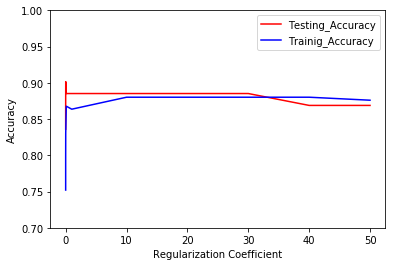

In [68]:
# plot accuracy vs Regularization Coefficient
pyplot.plot(c,Score_DF['Testing_score'],'r-',label='Testing_Accuracy')
pyplot.plot(c,Score_DF['Training_score'],'b-',label='Trainig_Accuracy')
pyplot.xlabel('Regularization Coefficient')
pyplot.ylabel('Accuracy')
pyplot.legend()
axes = pyplot.gca()
axes.set_ylim([0.70,1])
pyplot.legend()
pyplot.show()

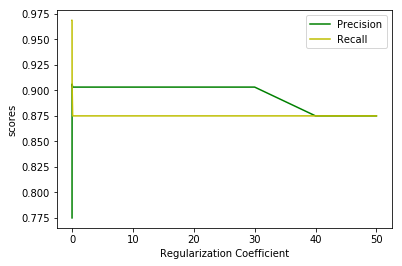

In [69]:
# plot scores(Precision,Recall) vs Regularization Coefficient
pyplot.plot(c,Score_DF['Precision'],'g-',label='Precision')
pyplot.plot(c,Score_DF['Recall'],'y-',label='Recall')
pyplot.xlabel('Regularization Coefficient')
pyplot.ylabel('scores')
pyplot.legend()
pyplot.show()

# For Different Value of C and L1 Penalty

In [70]:
# we will try with L1 Penalty and different value of Regularization Coefficient
c =[0.1,1,10,20,30,40,50]
Training_score ,Testing_score,TP,FP,FN,Precision,Recall,classifiers_list = [],[],[],[],[],[],[],[]
for i in range(0,len(c)):
    clf = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=c[i], fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    Training_score.append(clf.score(X_train,y_train))
    Testing_score.append(clf.score(X_test,y_test))
    TP.append(cm[1][1])
    FP.append(cm[0][1])
    FN.append(cm[1][0])
    Precision.append( precision_score(y_test,y_pred))
    Recall.append(recall_score(y_test,y_pred))

Score_DF = pd.DataFrame()
Score_DF['C value'] = c
Score_DF['Training_score'] = Training_score
Score_DF['Testing_score'] = Testing_score
Score_DF['True_positive'] = TP
Score_DF['False_positive'] = FP
Score_DF['False_negative'] = FN
Score_DF['Precision'] = Precision
Score_DF['Recall'] = Recall
Score_DF

,C value,Training_score,Testing_score,True_positive,False_positive,False_negative,Precision,Recall
0,0.1,0.859504,0.901639,29,3,3,0.90625,0.90625
1,1.0,0.867769,0.868852,28,4,4,0.87500,0.87500
2,10.0,0.880165,0.868852,28,4,4,0.87500,0.87500
3,20.0,0.876033,0.868852,28,4,4,0.87500,0.87500
4,30.0,0.876033,0.868852,28,4,4,0.87500,0.87500
5,40.0,0.880165,0.868852,28,4,4,0.87500,0.87500
6,50.0,0.880165,0.868852,28,4,4,0.87500,0.87500


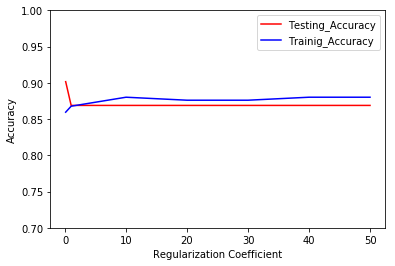

In [71]:
# plot accuracy vs Regularization Coefficient
pyplot.plot(c,Score_DF['Testing_score'],'r-',label='Testing_Accuracy')
pyplot.plot(c,Score_DF['Training_score'],'b-',label='Trainig_Accuracy')
pyplot.xlabel('Regularization Coefficient')
pyplot.ylabel('Accuracy')
pyplot.legend()
axes = pyplot.gca()
axes.set_ylim([0.70,1])
pyplot.legend()
pyplot.show()

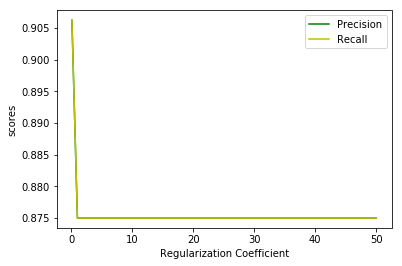

In [72]:
# plot scores(Precision,Recall) vs Regularization Coefficient
pyplot.plot(c,Score_DF['Precision'],'g-',label='Precision')
pyplot.plot(c,Score_DF['Recall'],'y-',label='Recall')
pyplot.xlabel('Regularization Coefficient')
pyplot.ylabel('scores')
pyplot.legend()
pyplot.show()